# Coding Exercises (Part 2)

## Full Data Workflow A-Z: Data Preparation and Feature Creation

### Exercise 15: Data Preparation and Feature Creation

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

132. Import and inspect the cars dataset (cars.csv)!

In [65]:
import pandas as pd
cars = pd.read_csv("cars.csv")
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


133. __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [66]:
cars.model_year = cars.model_year.add(1900)

134. __Transform__ the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

In [67]:
cars["gp100m"] = cars.mpg = (1 / cars.mpg) * 100

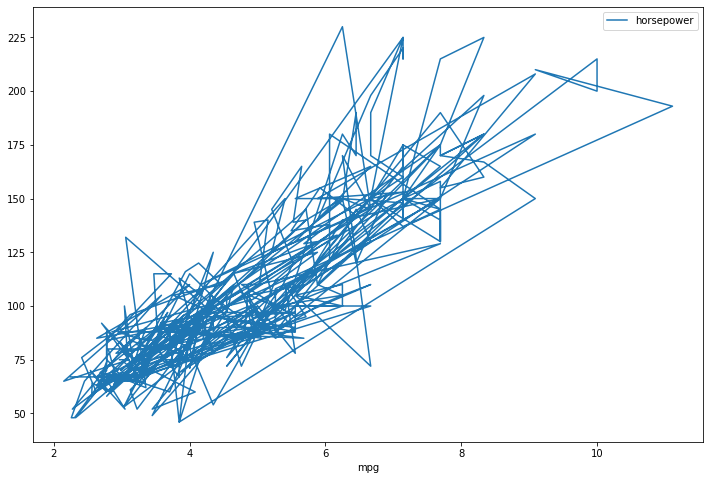

In [68]:
import matplotlib.pyplot as plt
cars.loc[:, ["mpg", "horsepower"]].set_index("mpg").plot(figsize = (12,8))
plt.show()

135. Create a __new column__ with the __manufacturer__ name!

In [69]:
cars["manufacturer"] = cars.name.str.split(" ", n = 1, expand = True)[0]
cars.manufacturer

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397    chevrolet
Name: manufacturer, Length: 398, dtype: object

136. Add a __new column__ with the respective __continent__ (north america, asia, europe)!

In [70]:
mapper = {"usa":"north america", "japan":"asia", "europe":"europe"}
cars["continent"] = cars.origin.map(mapper)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gp100m,manufacturer,continent
0,5.555556,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.555556,chevrolet,north america
1,6.666667,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.666667,buick,north america
2,5.555556,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.555556,plymouth,north america
3,6.250000,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.250000,amc,north america
4,5.882353,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.882353,ford,north america
...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.703704,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl,3.703704,ford,north america
394,2.272727,4,97.0,52.0,2130,24.6,1982,europe,vw pickup,2.272727,vw,europe
395,3.125000,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage,3.125000,dodge,north america
396,3.571429,4,120.0,79.0,2625,18.6,1982,usa,ford ranger,3.571429,ford,north america


137. __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

In [71]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
 9   gp100m        398 non-null    float64
 10  manufacturer  398 non-null    object 
 11  continent     398 non-null    object 
dtypes: float64(5), int64(3), object(4)
memory usage: 37.4+ KB


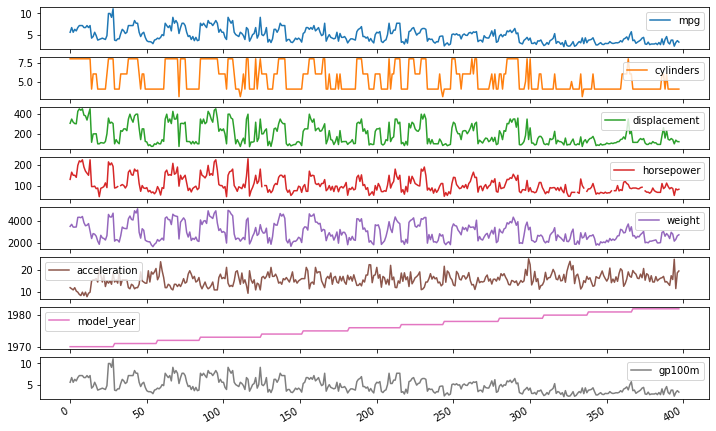

In [72]:
cars.plot(figsize=(12,8), subplots=True)
plt.show()

138. __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column __"weight_cat"__!

In [73]:
cars["weight_cat"] = pd.qcut(cars.weight, [0, 0.25, 0.75, 1], precision = 2, labels = ["light", "medium", "heavy"])
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gp100m,manufacturer,continent,weight_cat
0,5.555556,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.555556,chevrolet,north america,medium
1,6.666667,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.666667,buick,north america,heavy
2,5.555556,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.555556,plymouth,north america,medium
3,6.250000,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.250000,amc,north america,medium
4,5.882353,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.882353,ford,north america,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.703704,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl,3.703704,ford,north america,medium
394,2.272727,4,97.0,52.0,2130,24.6,1982,europe,vw pickup,2.272727,vw,europe,light
395,3.125000,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage,3.125000,dodge,north america,medium
396,3.571429,4,120.0,79.0,2625,18.6,1982,usa,ford ranger,3.571429,ford,north america,medium


139. __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [74]:
cars.drop(columns = ["cylinders", "displacement", "weight", "acceleration", "name", "mpg"], inplace = True)
cars

,horsepower,model_year,origin,gp100m,manufacturer,continent,weight_cat
0,130.0,1970,usa,5.555556,chevrolet,north america,medium
1,165.0,1970,usa,6.666667,buick,north america,heavy
2,150.0,1970,usa,5.555556,plymouth,north america,medium
3,150.0,1970,usa,6.250000,amc,north america,medium
4,140.0,1970,usa,5.882353,ford,north america,medium
...,...,...,...,...,...,...,...
393,86.0,1982,usa,3.703704,ford,north america,medium
394,52.0,1982,europe,2.272727,vw,europe,light
395,84.0,1982,usa,3.125000,dodge,north america,medium
396,79.0,1982,usa,3.571429,ford,north america,medium


140. Bring the columns __horsepower__ and the column that you created in __question 133__ (transformed mpg column) to the same __scale__ by calculating __z-scores__! __Visualize__ before and after!

In [77]:
hp_mean = cars.horsepower.mean()
hp_std = cars.horsepower.std()

gpm_mean = cars.gp100m.mean()
gpm_std = cars.gp100m.std()

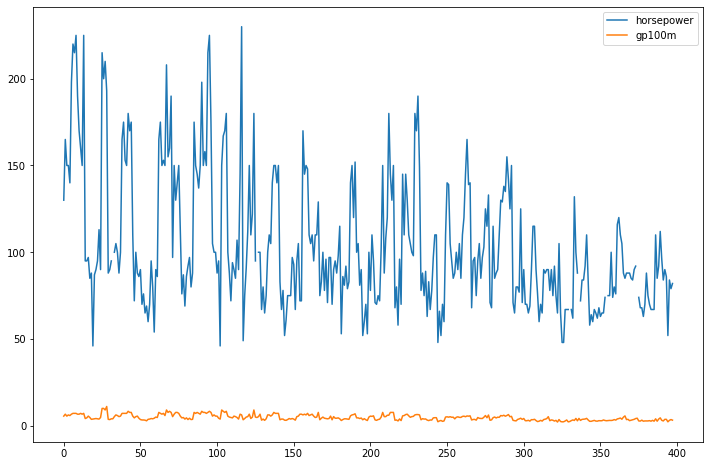

In [83]:
cars.loc[:, ["horsepower", "gp100m"]].plot(figsize=(12,8))
plt.show()

In [84]:
cars["hp_z"] = (cars.horsepower - hp_mean) / hp_std
cars["gpm_z"] = (cars.gp100m - gpm_mean) / gpm_std

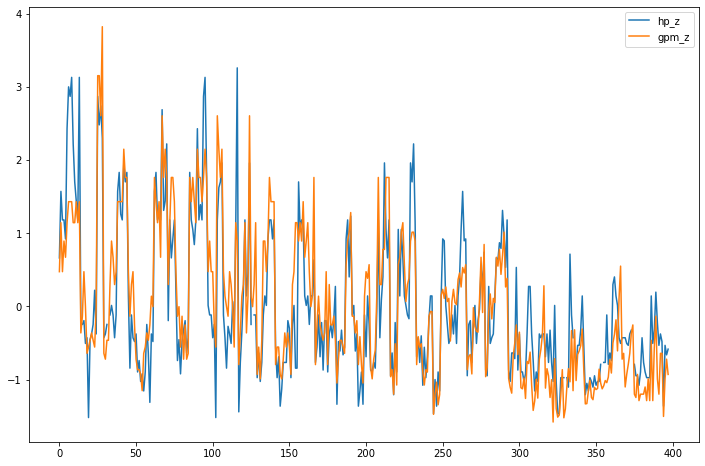

In [85]:
cars.loc[:, ["hp_z", "gpm_z"]].plot(figsize=(12,8))
plt.show()

141. __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [87]:
pd.get_dummies(cars, columns = ["model_year", "origin"], drop_first = True)

,horsepower,gp100m,manufacturer,continent,weight_cat,hp_z,gpm_z,model_year_1971,model_year_1972,model_year_1973,...,model_year_1975,model_year_1976,model_year_1977,model_year_1978,model_year_1979,model_year_1980,model_year_1981,model_year_1982,origin_japan,origin_usa
0,130.0,5.555556,chevrolet,north america,medium,0.663285,0.475239,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,165.0,6.666667,buick,north america,heavy,1.572585,1.145008,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,150.0,5.555556,plymouth,north america,medium,1.182885,0.475239,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150.0,6.250000,amc,north america,medium,1.182885,0.893845,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,140.0,5.882353,ford,north america,medium,0.923085,0.672230,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,86.0,3.703704,ford,north america,medium,-0.479835,-0.641044,0,0,0,...,0,0,0,0,0,0,0,1,0,1
394,52.0,2.272727,vw,europe,light,-1.363154,-1.503626,0,0,0,...,0,0,0,0,0,0,0,1,0,0
395,84.0,3.125000,dodge,north america,medium,-0.531795,-0.989882,0,0,0,...,0,0,0,0,0,0,0,1,0,1
396,79.0,3.571429,ford,north america,medium,-0.661694,-0.720778,0,0,0,...,0,0,0,0,0,0,0,1,0,1


-----------------------------------------------------------------------------

## Option 2: Guided and Instructed

### No further guidance this time! Prepare yourself for the final challenge! (Take a look at the Hints, if necessary)

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

----------------------------

## Hints (Spoiler!)

132. At this point, you should know this!

133. Use the add() method.

134. 1/mpg * 100

135. string method split()

136. Pass a mapper/dictionary to the map() method

137. Lineplot for all columns. Hint: Nothing to cap / floor

138. pd.qcut()

139. drop() method

140. z-score for all elements in horsepower column: z-score = (cars.horsepower - cars.horsepower.mean()) / cars.horsepower.std()

141. pd.get_dummies(); drop_first = True